In [42]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.4, style='darkgrid')
from lr import LogisticRegression
from sklearn.model_selection import train_test_split
from optimizers import SGD, Adam
from sklearn.metrics import balanced_accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Task 3.2

In [81]:
def run_experiments(data_list, seed_list, optimizer_classes, optimizer_params):
    results_df = pd.DataFrame(columns=['seed', 'dataset', 'method', 'balanced_accuracy'])
    for seed in seed_list:
        for i in range(len(data_list)):
            data = data_list[i]
            X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.2, random_state=seed)
            for optimizer_class in optimizer_classes:
                optimizer = optimizer_class(**optimizer_params.get(optimizer_class.__name__, {}))
                model = LogisticRegression(optimizer, early_stopping_rounds=10, epochs=500)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                score = balanced_accuracy_score(y_test, y_pred)
                results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
    return results_df

In [45]:
def plot_boxplots(results_df):
    for optimizer in results_df['method'].unique():
        optimizer_data = results_df[results_df['method'] == optimizer]
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=optimizer_data, x='dataset', y='balanced_accuracy', color=sns.color_palette()[0])
        plt.title(f'Boxplot of Balanced Accuracy for {optimizer}')
        plt.xlabel('Dataset')
        plt.ylabel('Balanced Accuracy')
        plt.show()

In [9]:
with open('data_list.pkl', 'rb') as f:
    data_list = pickle.load(f)

seed_list = [101, 202, 303, 404, 505]
optimizer_classes = [SGD]
optimizer_params = {
    'SGD': {'learning_rate': 0.0001}
}

results_df = run_experiments(data_list, seed_list, optimizer_classes, optimizer_params)

Stopping early at epoch 26 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 34 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 57 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 203 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 258 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
c:\Users\User\Desktop\Studia\AML\AML_project\src\lr.py:40: RuntimeWarning: overflow encountered in exp
  # Initialize weights between -1 and 1
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'datase

Stopping early at epoch 68 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 47 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 165 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 273 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 250 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
c:\Users\User\Desktop\Studia\AML\AML_project\src\lr.py:40: RuntimeWarning: overflow encountered in exp
  # Initialize weights between -1 and 1
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'datase

Stopping early at epoch 32 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 315 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 11 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 267 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 217 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
c:\Users\User\Desktop\Studia\AML\AML_project\src\lr.py:40: RuntimeWarning: overflow encountered in exp
  # Initialize weights between -1 and 1
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'datase

Stopping early at epoch 40 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 324 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 20 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-8-320252eaeaae>:13: FutureWarning:

Stopping early at epoch 22 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 127 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 17 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)


Stopping early at epoch 166 with increasing loss


<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-8-320252eaeaae>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'optimizer': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
c:\Users\User\Desktop\Studia\AML\AML_project\src\

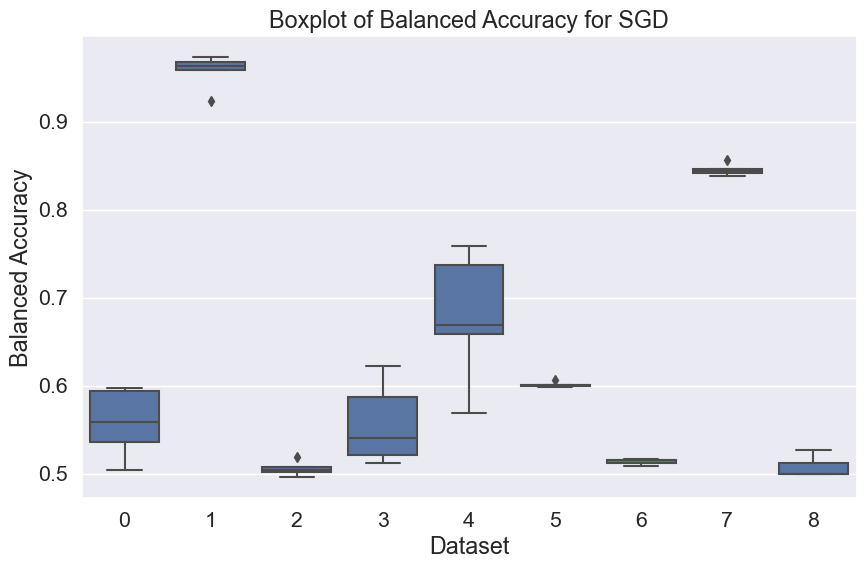

In [26]:
plot_boxplots(results_df)

## Task 3.3

In [12]:
def plot_losses(data_list, optimizer):
    plt.figure(figsize=(10, 6))
    for i in range(len(data_list)):
        dataset = data_list[i]
        X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.2, random_state=101)
        model = LogisticRegression(optimizer, epochs=500)
        model.fit(X_train, y_train)
        plt.plot(model.losses, label='Dataset ' + str(i+1))
    plt.title(f'Model Losses with {type(optimizer).__name__} optimizer')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Log-likelihood')
    plt.show()

In [13]:
optimizer = SGD(learning_rate=0.0001)
plot_losses(data_list, optimizer)

KeyboardInterrupt: 

c:\Users\User\Desktop\Studia\AML\AML_project\src\lr.py:49: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


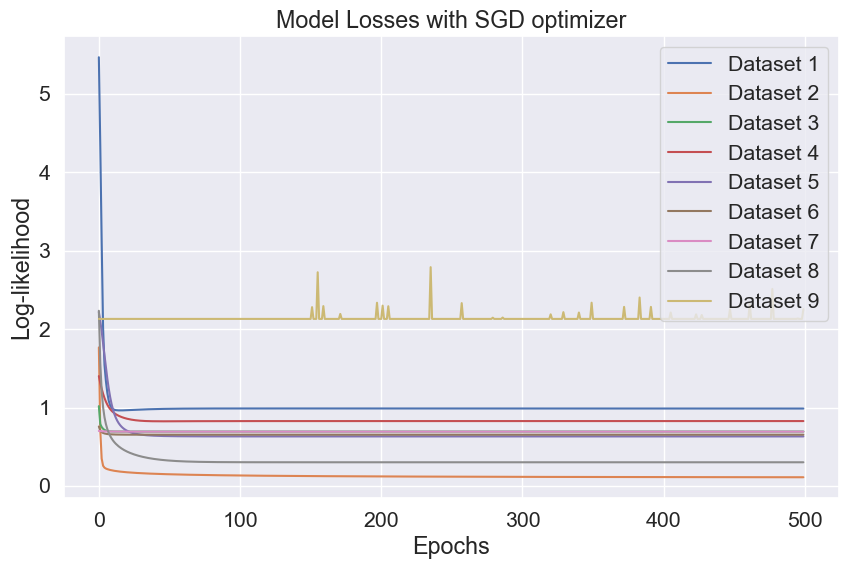

In [7]:
plt.figure(figsize=(10, 6))
optimizer = SGD(learning_rate=0.0001)

for i in range(len(data_list)):
    dataset = data_list[i]
    X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.2, random_state=101)
    model = LogisticRegression(optimizer, epochs=500)
    model.fit(X_train, y_train)
    plt.plot(model.losses, label='Dataset ' + str(i+1))
plt.title('Model Losses with SGD optimizer')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Log-likelihood')
plt.show()

## Task 3.4

In [51]:
def run_baseline(data_list, seed_list, classifiers):
    results_df = pd.DataFrame(columns=['seed', 'dataset', 'classifier', 'balanced_accuracy'])
    for seed in seed_list:
        for i in range(len(data_list)):
            data = data_list[i]
            X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.2, random_state=seed)
            for classifier in classifiers:
                model = classifier()
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                score = balanced_accuracy_score(y_test, y_pred)
                results_df = results_df.append({'seed': seed, 'dataset': i+1, 'method': type(model).__name__, 'balanced_accuracy': score}, ignore_index=True)
    return results_df

In [17]:
classifiers = [LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis, DecisionTreeClassifier, RandomForestClassifier]
seed_list = [101, 202, 303, 404, 505]
baseline_results_df = run_baseline(data_list, seed_list, classifiers)

<ipython-input-14-11e20a8627ba>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'classifier': type(model).__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-14-11e20a8627ba>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'classifier': type(model).__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-14-11e20a8627ba>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'classifier': type(model).__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-14-11e20a8627ba>:12: FutureWarning: The 

In [46]:
final_results_df = pd.concat([results_df, baseline_results_df])

In [49]:
def plot_all(results_df):
    for dataset in results_df['dataset'].unique():
        df = results_df[results_df['dataset'] == dataset]
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x='method', y='balanced_accuracy', color=sns.color_palette()[0])
        plt.title(f'Boxplot of Balanced Accuracy for Dataset {dataset}')
        plt.xticks(ticks=range(len(df['method'].unique())), labels=['SGD', 'LDA', 'QDA', 'Decision Tree', 'Random Forest'])
        plt.xlabel('Method')
        plt.ylabel('Balanced Accuracy')
        plt.show()

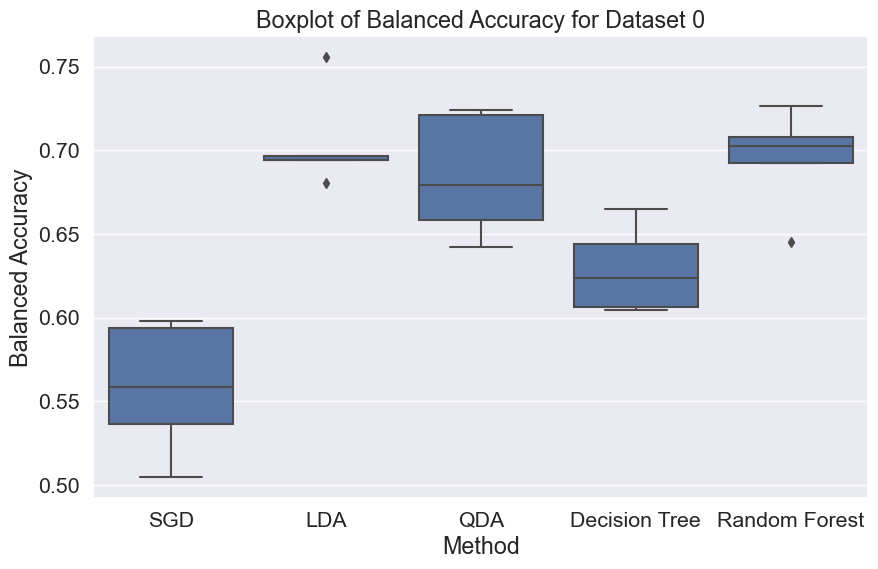

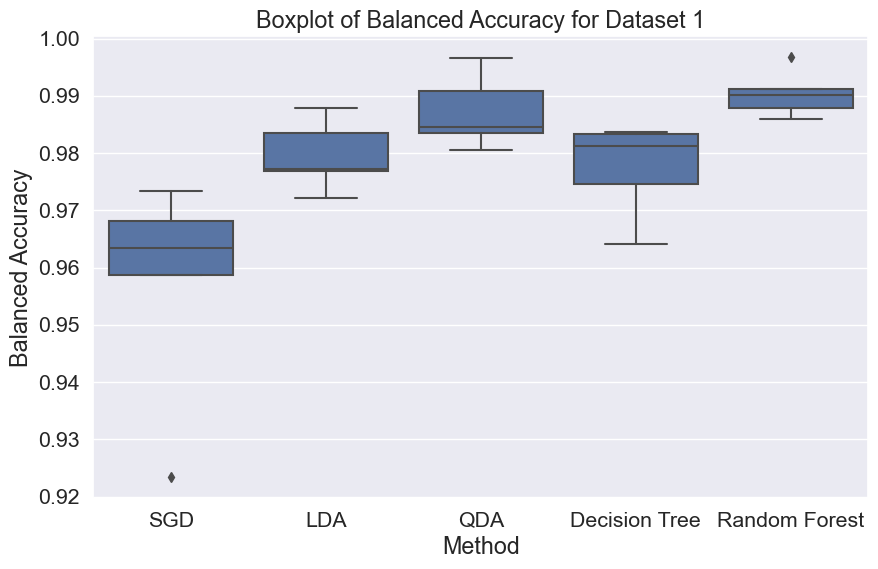

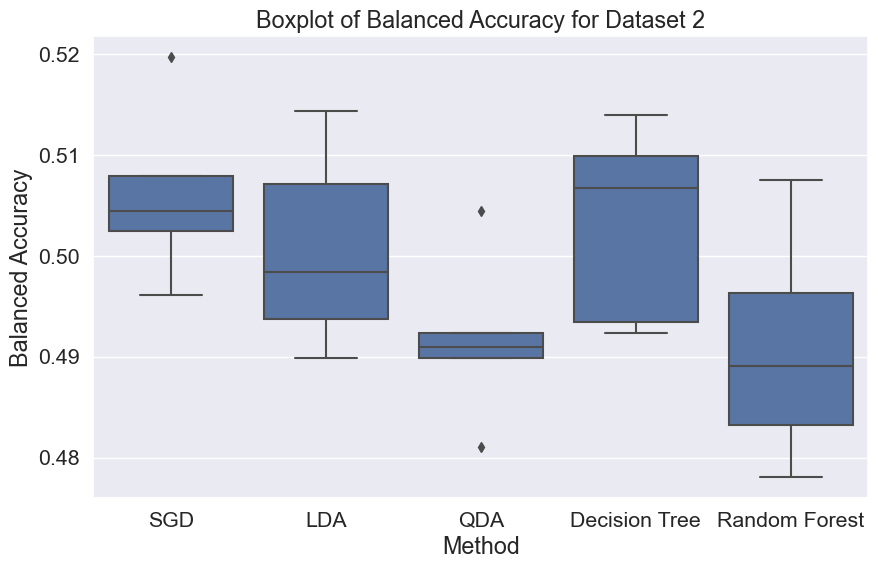

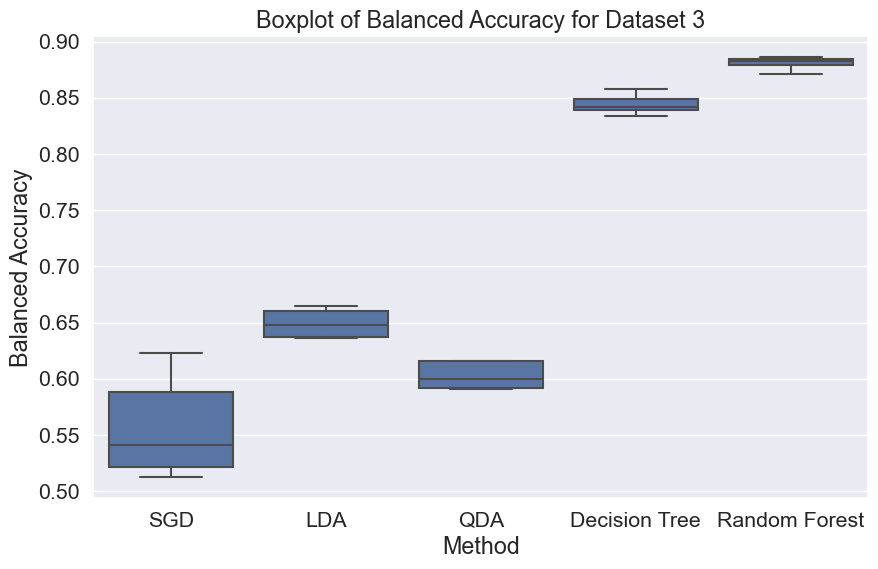

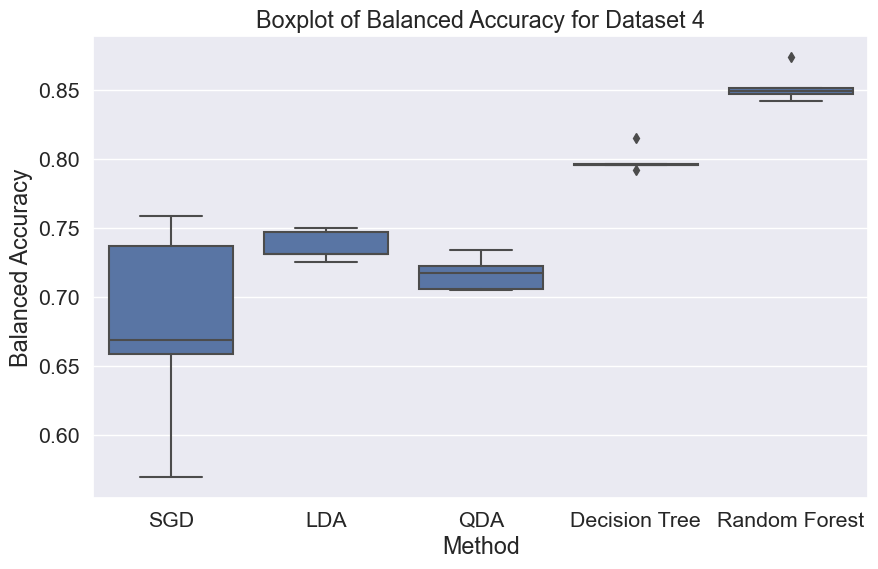

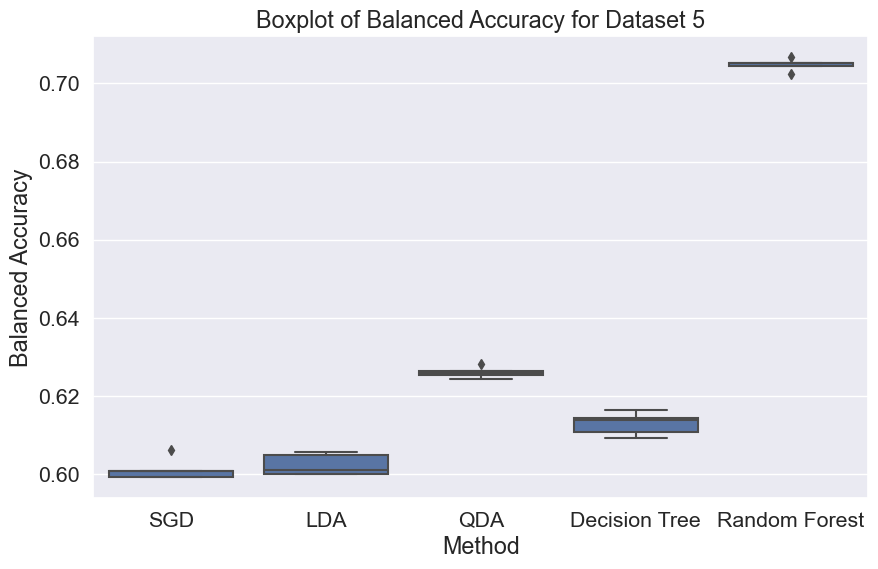

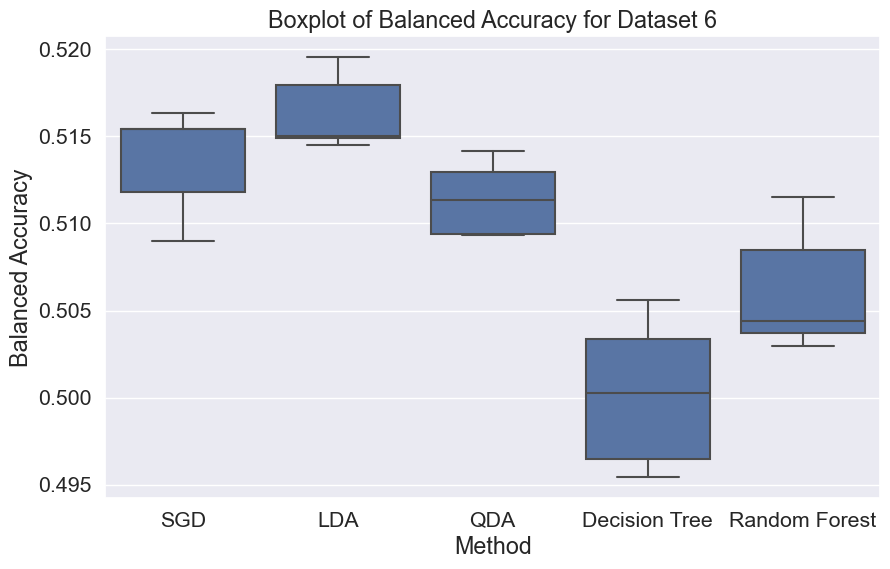

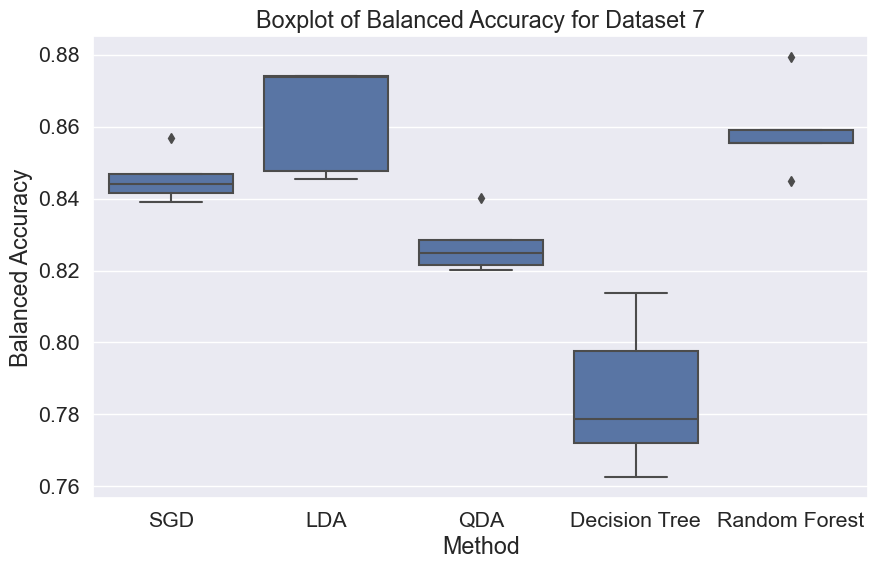

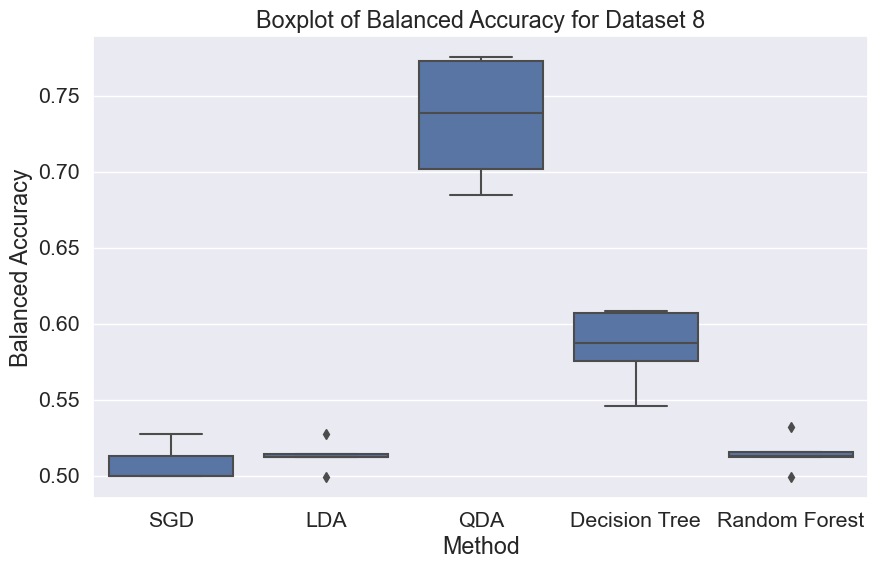

In [50]:
plot_all(final_results_df)

## Task 3.5

In [56]:
def add_interactions(data):
    n, m = data.shape
    data = pd.DataFrame(data)
    for i in range(m):
        for j in range(i+1, m):
            data[f'interaction_{i}_{j}'] = data[i] * data[j]
    return data.values

In [62]:
data_list_interactions = data_list[:3]
data_list_interactions = [(add_interactions(X), y) for X, y in data_list_interactions]

In [82]:
seed_list = [101, 202, 303, 404, 505]
optimizer_classes = [SGD]
optimizer_params = {
    'SGD': {'learning_rate': 0.0001}
}
results_interactions = run_experiments(data_list_interactions, seed_list, optimizer_classes, optimizer_params)

c:\Users\User\Desktop\Studia\AML\AML_project\src\lr.py:49: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-81-ba6f6eaa1606>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-81-ba6f6eaa1606>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'method': optimizer_class.__name__, 'balanced_accuracy': score}, ignore_index=True)
<ipython-input-81-ba6f6eaa1606>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'seed': seed, 'dataset': i, 'metho

In [71]:
small_results_df = results_df[results_df['dataset'].isin([0, 1, 2])]

In [83]:
small_results_df['interactions'] = False
results_interactions['interactions'] = True

<ipython-input-83-43575dea50dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_results_df['interactions'] = False


In [84]:
final_results_df = pd.concat([small_results_df, results_interactions])

In [86]:
final_results_df

,seed,dataset,method,balanced_accuracy,interactions
0,101,0,SGD,0.536551,False
1,101,1,SGD,0.968182,False
2,101,2,SGD,0.507934,False
9,202,0,SGD,0.598148,False
10,202,1,SGD,0.958678,False
11,202,2,SGD,0.519696,False
18,303,0,SGD,0.593930,False
19,303,1,SGD,0.923387,False
20,303,2,SGD,0.502477,False
27,404,0,SGD,0.558549,False


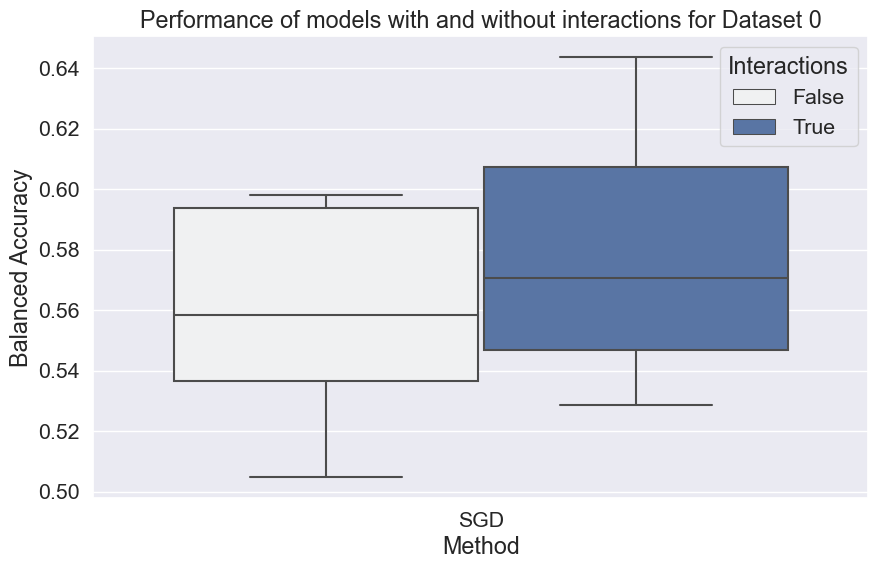

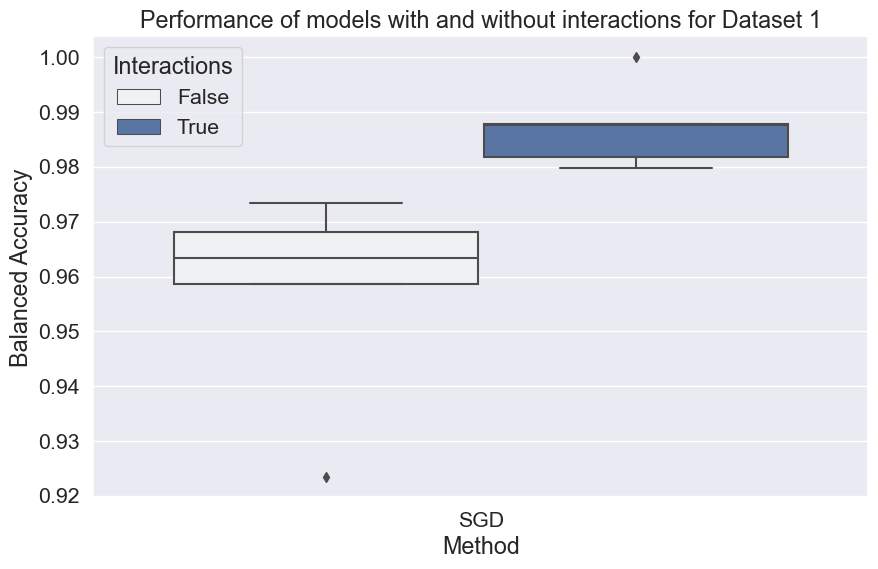

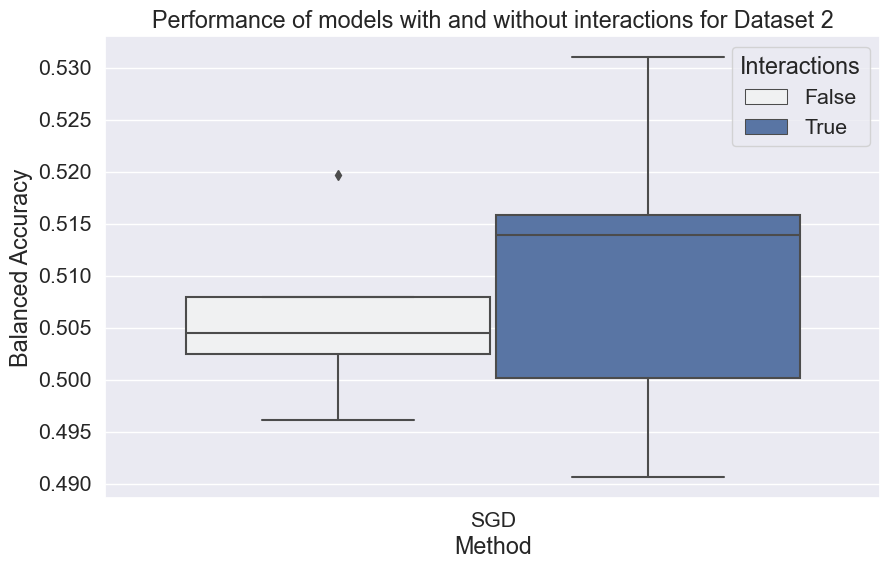

In [88]:
for dataset in final_results_df['dataset'].unique():
    df = final_results_df[final_results_df['dataset'] == dataset]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='method', y='balanced_accuracy', hue='interactions', color=sns.color_palette()[0])
    plt.title(f'Performance of models with and without interactions for Dataset {dataset}')
    plt.xlabel('Method')
    plt.ylabel('Balanced Accuracy')
    plt.legend(title='Interactions')
    plt.show()